In [44]:
import pandas as pd
import numpy as np
import datetime 
import seaborn as sns
import config 

In [45]:
# get module variables
ROOT_DIR = config.ROOT_DIR

In [46]:
student_grades = pd.read_csv(rf"{ROOT_DIR}\data\student_grades.csv")

In [47]:
student_grades.head()

,Student ID,Undergrad Degree,Undergrad Grade,MBA Grade,Work Experience,Employability (Before),Employability (After),Status,Annual Salary
0,1,Business,68.4,90.2,No,252,276,Placed,111000.0
1,2,Business,62.1,92.8,No,423,410,Not Placed,NaN
2,3,Computer Science,70.2,68.7,Yes,101,119,Placed,107000.0
3,4,Engineering,75.1,80.7,No,288,334,Not Placed,NaN
4,5,Finance,60.9,74.9,No,248,252,Not Placed,NaN


In [48]:
student_grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Student ID              95 non-null     int64  
 1   Undergrad Degree        95 non-null     object 
 2   Undergrad Grade         95 non-null     float64
 3   MBA Grade               95 non-null     float64
 4   Work Experience         95 non-null     object 
 5   Employability (Before)  95 non-null     int64  
 6   Employability (After)   95 non-null     int64  
 7   Status                  95 non-null     object 
 8   Annual Salary           53 non-null     float64
dtypes: float64(3), int64(3), object(3)
memory usage: 6.8+ KB


In [49]:
# summary satistics for numeric columns
student_grades.loc[:, ["Undergrad Grade", "MBA Grade", "Employability (Before)", "Employability (After)", "Annual Salary"]].describe()

,Undergrad Grade,MBA Grade,Employability (Before),Employability (After),Annual Salary
count,95.000000,95.000000,95.000000,95.000000,53.000000
mean,74.973684,80.169474,239.905263,289.347368,119386.792453
std,7.541731,6.170780,85.940488,93.521049,45546.958176
min,60.900000,62.600000,62.000000,102.000000,75500.000000
25%,68.700000,76.050000,181.500000,228.000000,99000.000000
50%,75.600000,80.200000,236.000000,286.000000,104500.000000
75%,79.350000,84.650000,287.000000,348.000000,124000.000000
max,100.000000,96.100000,423.000000,481.000000,340000.000000


#### What is absolute number and propertion of undergrad degrees taken by students?

In [50]:
# absolute frequency table for Undergrad Degree
student_grades.loc[:, ["Undergrad Degree"]].value_counts().to_frame(name="Absolute Frequency")

,Absolute Frequency
Undergrad Degree,
Business,36
Computer Science,19
Engineering,18
Finance,13
Art,9


In [51]:
# relative frequency table for Undergrad Degree
student_grades.loc[:, ["Undergrad Degree"]].value_counts(normalize=True).to_frame(name="Relative Frequency")

,Relative Frequency
Undergrad Degree,
Business,0.378947
Computer Science,0.200000
Engineering,0.189474
Finance,0.136842
Art,0.094737


### What proportion of graduates were placed within 2 months of graduation?

In [52]:
# absolute frequency table for Categorical Variable Status
student_grades.loc[:, ["Status"]].value_counts().to_frame(name="Absolute Frequency")

,Absolute Frequency
Status,
Placed,53
Not Placed,42


In [53]:
# relative frequency table for Categorical Variable Status
student_grades.loc[:, ["Status"]].value_counts(normalize=True).to_frame(name="Relative Frequency")

,Relative Frequency
Status,
Placed,0.557895
Not Placed,0.442105


#### Analyze continuous numeric variable Undergrad grade

In [54]:
student_grades

,Student ID,Undergrad Degree,Undergrad Grade,MBA Grade,Work Experience,Employability (Before),Employability (After),Status,Annual Salary
0,1,Business,68.4,90.2,No,252,276,Placed,111000.0
1,2,Business,62.1,92.8,No,423,410,Not Placed,NaN
2,3,Computer Science,70.2,68.7,Yes,101,119,Placed,107000.0
3,4,Engineering,75.1,80.7,No,288,334,Not Placed,NaN
4,5,Finance,60.9,74.9,No,248,252,Not Placed,NaN
...,...,...,...,...,...,...,...,...,...
90,91,Business,76.0,77.9,No,326,369,Placed,99500.0
91,92,Computer Science,67.7,86.1,No,421,457,Placed,107000.0
92,93,Engineering,75.3,89.9,No,368,421,Not Placed,NaN
93,94,Engineering,68.1,83.1,No,279,282,Placed,84000.0


In [55]:
sns.set_style('whitegrid')

# extract the bin edges for Undergrad Grade
bin_edges = np.histogram(student_grades["Undergrad Grade"])[1]
print(bin_edges)

[ 60.9   64.81  68.72  72.63  76.54  80.45  84.36  88.27  92.18  96.09
 100.  ]


In [56]:
pd.merge(left=pd.cut(student_grades["Undergrad Grade"], bins=bin_edges).value_counts().to_frame(name="Absolute Frequency"), right=pd.cut(student_grades["Undergrad Grade"], bins=bin_edges).value_counts(normalize=True).to_frame(name="Relative Frequency"), left_index=True, right_index=True).reset_index().rename(columns={"index": "Undergrad Grade"})

,Undergrad Grade,Absolute Frequency,Relative Frequency
0,"(72.63, 76.54]",24,0.255319
1,"(64.81, 68.72]",17,0.180851
2,"(76.54, 80.45]",15,0.159574
3,"(80.45, 84.36]",13,0.138298
4,"(68.72, 72.63]",11,0.117021
5,"(60.9, 64.81]",7,0.074468
6,"(88.27, 92.18]",3,0.031915
7,"(84.36, 88.27]",2,0.021277
8,"(92.18, 96.09]",1,0.010638
9,"(96.09, 100.0]",1,0.010638


<AxesSubplot: title={'center': 'Undergrade Grade Distribution'}, ylabel='Frequency'>

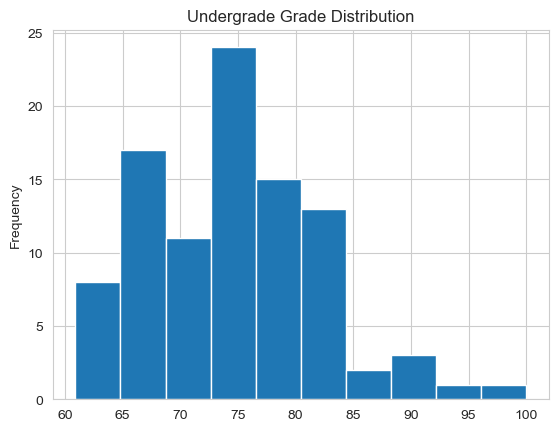

In [57]:
student_grades["Undergrad Grade"].plot(kind="hist", title="Undergrade Grade Distribution")

In [58]:
# extract the bin edges for MBA Grade
bin_edges = np.histogram(student_grades["MBA Grade"])[1]
print(bin_edges)

[62.6  65.95 69.3  72.65 76.   79.35 82.7  86.05 89.4  92.75 96.1 ]


In [59]:
pd.merge(left=pd.cut(student_grades["MBA Grade"], bins=bin_edges).value_counts().to_frame("Absolute Frequency"), right=pd.cut(student_grades["MBA Grade"], bins=bin_edges).value_counts(normalize=True).to_frame("Relative Frequency"), left_index=True, right_index=True).reset_index().rename(columns={"index": "MBA Grade"})


,MBA Grade,Absolute Frequency,Relative Frequency
0,"(79.35, 82.7]",21,0.223404
1,"(82.7, 86.05]",18,0.191489
2,"(76.0, 79.35]",16,0.170213
3,"(69.3, 72.65]",11,0.117021
4,"(86.05, 89.4]",11,0.117021
5,"(72.65, 76.0]",10,0.106383
6,"(89.4, 92.75]",3,0.031915
7,"(65.95, 69.3]",2,0.021277
8,"(92.75, 96.1]",2,0.021277
9,"(62.6, 65.95]",0,0.000000


<AxesSubplot: title={'center': 'MBA Grade Distribution'}, ylabel='Frequency'>

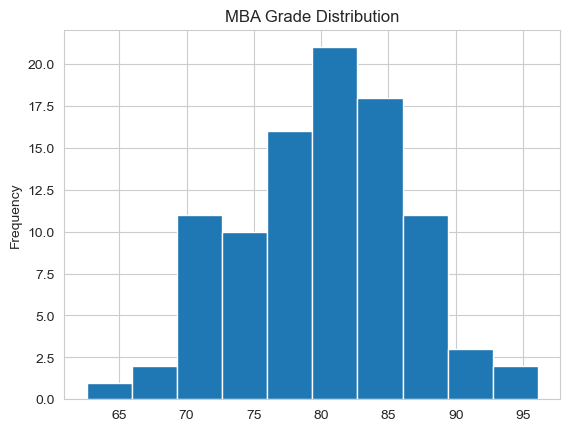

In [60]:
student_grades["MBA Grade"].plot(kind="hist", title="MBA Grade Distribution")

In [61]:
# extract the bin edges for Annual Salary
bin_edges = np.histogram(student_grades["Annual Salary"].dropna(), bins=15)[1]

In [62]:
# get the absolute frequency table for the bin edges from above distribution
pd.merge(left= pd.cut(student_grades["Annual Salary"], bins=bin_edges).value_counts().to_frame("Absolute Frequency"), right=pd.cut(student_grades["Annual Salary"], bins=bin_edges).value_counts(normalize=True).to_frame("Relative Frequency"), left_index=True, right_index=True).reset_index().rename(columns={"index": "Annual Salary Range"})

,Annual Salary Range,Absolute Frequency,Relative Frequency
0,"(93133.333, 110766.667]",19,0.365385
1,"(75500.0, 93133.333]",11,0.211538
2,"(110766.667, 128400.0]",11,0.211538
3,"(146033.333, 163666.667]",3,0.057692
4,"(128400.0, 146033.333]",2,0.038462
5,"(163666.667, 181300.0]",2,0.038462
6,"(181300.0, 198933.333]",1,0.019231
7,"(198933.333, 216566.667]",1,0.019231
8,"(251833.333, 269466.667]",1,0.019231
9,"(322366.667, 340000.0]",1,0.019231


<AxesSubplot: title={'center': 'Annual Salary Distribution for MBA Graduates'}, ylabel='Frequency'>

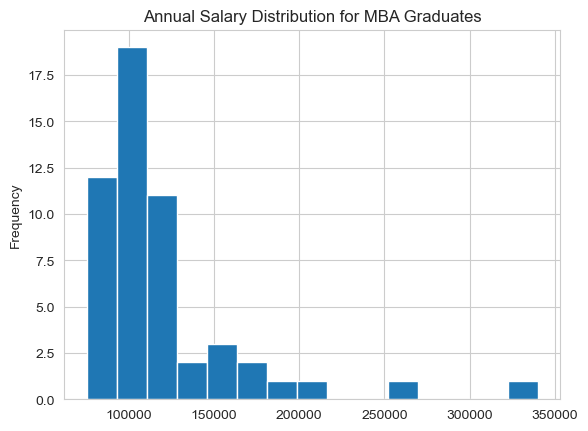

In [63]:
student_grades["Annual Salary"].plot(kind="hist", bins=15, title="Annual Salary Distribution for MBA Graduates")